# 単回帰モデルの作成

気温から販売数を予測するモデルを作成する

## 対象データ

ここではSIGNATEの[【練習問題】お弁当の需要予測データ](https://signate.jp/competitions/24/data)を使用している

### train.csv（学習データ）

* 説明変数：temperature
* 目的変数：y

### test.csv（評価データ）

* 説明変数：temperature

## 単回帰モデルの概要

* 1つの目的変数を1つの説明変数のみでモデル化する方法
* 散布図の中に、各データそれぞれに対するちょうどよい直線を引くイメージ
* **y = ax + b** の数式で表すことができる

## ダミー変数化

* 質的データを数値データに変換して使うこと
* 性別や天気を任意の数値に置き換える

## モデリングの手順

### 1. 説明変数の決定とデータの準備

* どのデータを使ってモデルを作るかを決める
* 欠損値の前処理をする
* 学習データから説明変数と目的変数を抽出する
* 評価データから説明変数を抽出する

### 2. モデルの準備

* どの手法を使ってモデルを作るかを決める

### 3. モデルの作成

* 学習データから取り出した説明変数と目的変数のデータを使ってモデルを作成する

### 4. モデルを使った予測

* 評価データから抽出した説明変数のデータを使い、作成したモデルに当てはめる

### 5. モデルの評価

* 評価データに対するモデルの予測結果と実際の値を比較して評価する

## データの準備

###  線形回帰用のライブラリ LinearRegression を使用する

インストールコマンドは下記
```
pip install scikit-learn
```

ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

CSVデータの読み込み

In [3]:
train = pd.read_csv('data/demand_forcast/train.csv')
test = pd.read_csv('data/demand_forcast/test.csv')
sample = pd.read_csv('data/demand_forcast/sample.csv', header=None)

欠損値を確認する

In [4]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [5]:
test.isnull().sum()

datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
dtype: int64

## 説明変数と目的変数の設定

学習データから説明変数を抽出する

In [6]:
trainX = train['temperature']

学習データから目的変数を抽出する

In [7]:
y = train['y']

評価データから説明変数を抽出する

In [8]:
testX = test['temperature']

説明変数を合わせるためにデータの整形をする

In [9]:
trainX = trainX.to_numpy().reshape(-1, 1)
testX = testX.to_numpy().reshape(-1, 1)

## モデルの準備

### モデルを表す変数を用意する

In [10]:
model = LR()

## モデルの作成

### fit関数でモデルを作成する

説明変数、目的変数の順に指定

In [11]:
model.fit(trainX, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


モデルの傾きを確認する

In [12]:
model.coef_

array([-2.5023821])

モデルの切片を確認する

In [13]:
model.intercept_

np.float64(134.79948383749922)

## モデルを使った予測

### predict関数での予測

In [14]:
model.predict(testX)

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

predict関数を使った予測結果を変数に代入する

In [15]:
pred = model.predict(testX)

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [16]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [17]:
sample[1] = pred

In [18]:
sample.head()

,0,1
0,2014-10-1,84.251365
1,2014-10-2,74.992552
2,2014-10-3,62.981117
3,2014-10-6,80.998269
4,2014-10-7,79.496839


sampleをCSVファイルに書き出す

In [19]:
sample.to_csv('data/demand_forcast/output_submit1.csv', index=False, header=False)

元のデータと予測値をグラフで比較する

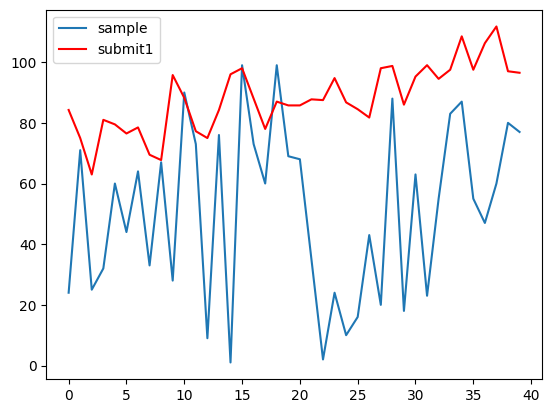

In [23]:
pd.read_csv('data/demand_forcast/sample.csv', header=None)[1].plot(label='sample')
pd.read_csv('data/demand_forcast/output_submit1.csv', header=None)[1].plot(label='submit1', color='red')
plt.legend()

書き出したファイルを[SIGNATE](https://signate.jp/competitions/24/data)に投稿して評価を確認する